### Introduction to Physical Oceanography Research Project ###

## The Energy Sources and Sinks of Nonlinear Mesoscale Eddies off Eastern Australia ##

### Supplementary Materials ###

$Ci\ Zhang$

$Department\ of\ Earth\ and\ Environmental\ Sciences,\ Columbia\ University,\ New\ York,\ NY\ 10027$

__1. Packages Importation__

In [3]:
import datetime
import folium
import math
import matplotlib.pylab as pl
import pandas as pd
import xray
import numpy as np
import seaborn as sns

from datetime import date
from datetime import timedelta
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from jdcal import jd2gcal
from scipy.stats import kendalltau

%matplotlib inline
sns.set()

__2. Data__

In [13]:
data = xray.open_dataset('/Users/eapsclimate/Desktop/eapsclimate/columbia/fall_2015/eesc_w4925/research/data/tracks_20130125.nc')
df = data.to_dataframe()

In [14]:
print(data)

<xray.Dataset>
Dimensions:  (Nobs: 2590938)
Coordinates:
  * Nobs     (Nobs) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    track    (Nobs) int32 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 ...
    n        (Nobs) int32 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 ...
    j1       (Nobs) timedelta64[ns] 100366 days 04:39:49.194932 ...
    cyc      (Nobs) int32 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
    lon      (Nobs) float32 636.74 635.99 635.82 635.845 560.642 561.447 ...
    lat      (Nobs) float32 -65.0011 -65.1376 -65.2457 -65.2933 -62.5424 ...
    A        (Nobs) float32 1.24564 2.64604 3.40119 1.45836 2.16156 4.87579 ...
    L        (Nobs) float32 44.464 36.7024 45.4221 43.022 63.0697 51.1345 ...
    U        (Nobs) float32 5.97993 8.17373 8.28628 5.20364 4.81408 6.59872 ...
Attributes:
    title: Mesoscale Eddies in Altimeter Observations of SSH
    institution: Oregon State University/CEOAS
    file_name: tracks.2013

In [15]:
df.head(4)

track  n                          j1  cyc         lon        lat  \
Nobs                                                                     
0         1  1 100366 days 04:39:49.194932   -1  636.739990 -65.001099   
1         1  2 100373 days 04:39:49.194932   -1  635.989990 -65.137604   
2         1  3 100380 days 04:39:49.194932   -1  635.820007 -65.245697   
3         1  4 100387 days 04:39:49.194932   -1  635.844971 -65.293297   

            A          L        U  
Nobs                               
0     1.24564  44.464001  5.97993  
1     2.64604  36.702400  8.17373  
2     3.40119  45.422100  8.28628  
3     1.45836  43.021999  5.20364

In [16]:
df.tail(4)

track  n                            j1  cyc         lon        lat  \
Nobs                                                                           
2590934  215184  1 -106047 days +05:05:15.485380    1  336.242004  62.275398   
2590935  215184  2 -106040 days +05:05:15.485380    1  336.033997  62.011700   
2590936  215184  3 -106033 days +05:05:15.485380    1  335.938995  62.359200   
2590937  215184  4 -106026 days +05:05:15.485380    1  335.752991  62.145901   

               A          L        U  
Nobs                                  
2590934  3.06445  54.620499  7.21748  
2590935  2.03734  53.794102  5.87109  
2590936  1.75523  30.240000  6.72342  
2590937  1.23239  37.190102  6.36023

__3. Energy Calculation__

Equation for energy calculation

$ E = mv^2 = \rho V v^2 = \rho \left( \pi L^2 h \right) U^2 $

Approximation for depth scale

$ h = 500 \ m $

In [17]:
U = df['U']*0.01
pi = np.pi
L = df['L']*1000
h = 500
rho = 1025

df['energy'] = rho * U**2 * (pi * L**2 * h)

In [9]:
df.head(4)

track  n                          j1  cyc         lon        lat  \
Nobs                                                                     
0         1  1 100366 days 04:39:49.194932   -1  636.739990 -65.001099   
1         1  2 100373 days 04:39:49.194932   -1  635.989990 -65.137604   
2         1  3 100380 days 04:39:49.194932   -1  635.820007 -65.245697   
3         1  4 100387 days 04:39:49.194932   -1  635.844971 -65.293297   

            A          L        U        energy  
Nobs                                             
0     1.24564  44.464001  5.97993  1.138290e+13  
1     2.64604  36.702400  8.17373  1.449016e+13  
2     3.40119  45.422100  8.28628  2.280853e+13  
3     1.45836  43.021999  5.20364  8.069366e+12

In [18]:
df.tail(4)

track  n                            j1  cyc         lon        lat  \
Nobs                                                                           
2590934  215184  1 -106047 days +05:05:15.485380    1  336.242004  62.275398   
2590935  215184  2 -106040 days +05:05:15.485380    1  336.033997  62.011700   
2590936  215184  3 -106033 days +05:05:15.485380    1  335.938995  62.359200   
2590937  215184  4 -106026 days +05:05:15.485380    1  335.752991  62.145901   

               A          L        U        energy  
Nobs                                                
2590934  3.06445  54.620499  7.21748  2.502224e+13  
2590935  2.03734  53.794102  5.87109  1.606018e+13  
2590936  1.75523  30.240000  6.72342  6.655609e+12  
2590937  1.23239  37.190102  6.36023  9.008326e+12

__4. Longitude Issue Fixing__

Fixing the issue of longitude range.

In [19]:
lon_fix_01 = df.where(df.lon <= 540).lon - 360
lon_fix_02 = df.where(df.lon > 540).lon - 720

lon_fix = lon_fix_01
lon_fix = lon_fix.fillna(lon_fix_02)
df.lon = lon_fix

In [20]:
df.head(4)

track  n                          j1  cyc        lon        lat  \
Nobs                                                                    
0         1  1 100366 days 04:39:49.194932   -1 -83.260010 -65.001099   
1         1  2 100373 days 04:39:49.194932   -1 -84.010010 -65.137604   
2         1  3 100380 days 04:39:49.194932   -1 -84.179993 -65.245697   
3         1  4 100387 days 04:39:49.194932   -1 -84.155029 -65.293297   

            A          L        U        energy  
Nobs                                             
0     1.24564  44.464001  5.97993  1.138290e+13  
1     2.64604  36.702400  8.17373  1.449016e+13  
2     3.40119  45.422100  8.28628  2.280853e+13  
3     1.45836  43.021999  5.20364  8.069366e+12

In [21]:
df.tail(4)

track  n                            j1  cyc        lon        lat  \
Nobs                                                                          
2590934  215184  1 -106047 days +05:05:15.485380    1 -23.757996  62.275398   
2590935  215184  2 -106040 days +05:05:15.485380    1 -23.966003  62.011700   
2590936  215184  3 -106033 days +05:05:15.485380    1 -24.061005  62.359200   
2590937  215184  4 -106026 days +05:05:15.485380    1 -24.247009  62.145901   

               A          L        U        energy  
Nobs                                                
2590934  3.06445  54.620499  7.21748  2.502224e+13  
2590935  2.03734  53.794102  5.87109  1.606018e+13  
2590936  1.75523  30.240000  6.72342  6.655609e+12  
2590937  1.23239  37.190102  6.36023  9.008326e+12

__5. Eddy Origins and Terminations__

In [23]:
latitude = df.lat
longtitude = df.lon
energy = df.energy

coordinate = pd.concat([latitude, longtitude, energy], axis=1)

In [24]:
coordinate.head(4)

lat        lon        energy
Nobs                                    
0    -65.001099 -83.260010  1.138290e+13
1    -65.137604 -84.010010  1.449016e+13
2    -65.245697 -84.179993  2.280853e+13
3    -65.293297 -84.155029  8.069366e+12

In [25]:
coordinate.tail(4)

lat        lon        energy
Nobs                                       
2590934  62.275398 -23.757996  2.502224e+13
2590935  62.011700 -23.966003  1.606018e+13
2590936  62.359200 -24.061005  6.655609e+12
2590937  62.145901 -24.247009  9.008326e+12

In [26]:
track = df.track
track = track.value_counts(normalize=False, sort=True, ascending=True, bins=None, dropna=False).reindex(range(1, 215185))
track = pd.DataFrame(track)
track.columns = ['track']

In [27]:
track.head(4)

track
1      4
2      4
3      4
4      4

In [28]:
track.tail(4)

track
215181      4
215182      4
215183      4
215184      4

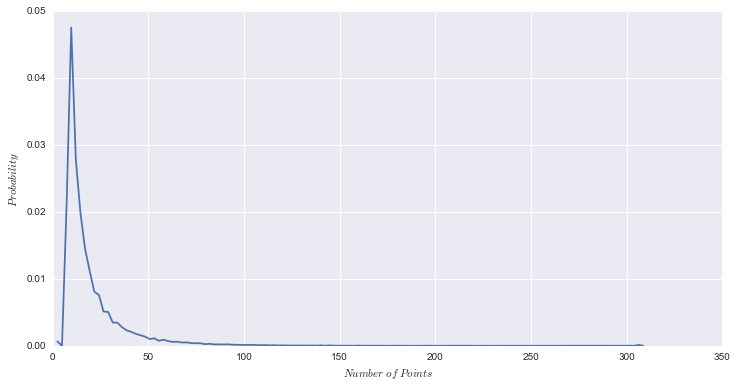

In [29]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(track, hist = False)

plt.xlabel('$Number \ of \ Points$')
plt.ylabel('$Probability$')

In [30]:
track_min = track['track'].min()
print(track_min)

4


In [31]:
track_max = track['track'].max()
print(track_max)

307


In [32]:
track_mean = track['track'].mean()
print(track_mean)

12.0405699308


In [33]:
track_mode = track['track'].mode()
print(track_mode)

0    4
dtype: int64


__6. Folium Maps__

In [34]:
map = folium.Map(location=[0,0], zoom_start=1, width=1000, height=500)
map_origins = folium.Map(location=[0,0], zoom_start=1, width=1000, height=500)
map_terminations = folium.Map(location=[0,0], zoom_start=1, width=1000, height=500)

i = 0
count = 0

while i < 17685:
    count = count + 1
    map_origins.circle_marker(location=[coordinate['lat'][i], coordinate['lon'][i]], radius=100,
                    popup='Eddy #' + str(count) + ' Origin', line_color='#ff0000',
                    fill_color='#ff0000')
    map.circle_marker(location=[coordinate['lat'][i], coordinate['lon'][i]], radius=100,
                    popup='Eddy #' + str(count) + ' Origin', line_color='#ff0000',
                    fill_color='#ff0000')
    i = i + track.track[count]
    map_terminations.circle_marker(location=[coordinate['lat'][i-1], coordinate['lon'][i-1]], radius=100,
                    popup='Eddy #' + str(count) + ' Termination', line_color='#0000ff',
                    fill_color='#0000ff')
    map.circle_marker(location=[coordinate['lat'][i-1], coordinate['lon'][i-1]], radius=100,
                    popup='Eddy #' + str(count) + ' Termination', line_color='#0000ff',
                    fill_color='#0000ff')

map.create_map(path='map.html')
map_origins.create_map(path='map_origins.html')
map_terminations.create_map(path='map_terminations.html')

Number of points plotted

In [35]:
print(count)

1000


In [36]:
def inline_map(m, width=1000, height=500):
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, width, height))
    return embed

In [37]:
inline_map(map_origins)

In [38]:
inline_map(map_terminations)

In [39]:
inline_map(map)

__7. Density Maps__

In [41]:
lat_origin = np.zeros((215184,1))
lon_origin = np.zeros((215184,1))
energy_origin = np.zeros((215184,1))

lat_termination = np.zeros((215184,1))
lon_termination = np.zeros((215184,1))
energy_termination = np.zeros((215184,1))

i = 0
count = 0

while i < 2590938:
    count = count + 1
    lat_origin[count-1] = coordinate['lat'][i]
    lon_origin[count-1] = coordinate['lon'][i]
    energy_origin[count-1] = coordinate['energy'][i]
    i = i + track.track[count]
    lat_termination[count-1] = coordinate['lat'][i-1]
    lon_termination[count-1] = coordinate['lon'][i-1]
    energy_termination[count-1] = coordinate['energy'][i-1]

In [42]:
lat_origin_df = pd.DataFrame(lat_origin)
lon_origin_df = pd.DataFrame(lon_origin)
energy_origin_df = pd.DataFrame(energy_origin)

lat_termination_df = pd.DataFrame(lat_termination)
lon_termination_df = pd.DataFrame(lon_termination)
energy_termination_df = pd.DataFrame(energy_termination)

In [43]:
coordinate_origin = pd.concat([lat_origin_df, lon_origin_df, energy_origin_df], axis=1)
coordinate_origin.columns = ['latitude', 'longitude', 'energy']

In [44]:
coordinate_origin.head(4)

latitude   longitude        energy
0 -65.001099  -83.260010  1.138290e+13
1 -62.542400 -159.357971  1.484267e+13
2 -60.751999  164.956970  8.649863e+13
3 -61.428299  129.165985  1.168999e+14

In [45]:
coordinate_origin.tail(4)

latitude   longitude        energy
215180  57.051998  -54.272003  6.399816e+13
215181  59.377102  166.807007  2.753182e+13
215182  59.680500  -52.615997  9.259184e+12
215183  62.275398  -23.757996  2.502224e+13

In [46]:
coordinate_termination = pd.concat([lat_termination_df, lon_termination_df, energy_termination_df], axis=1)
coordinate_termination.columns = ['latitude', 'longitude', 'energy']

In [47]:
coordinate_termination.head(4)

latitude   longitude        energy
0 -65.293297  -84.155029  8.069366e+12
1 -62.726101 -159.156006  1.129224e+13
2 -61.454601  166.448975  7.904814e+13
3 -61.127899  128.390015  6.476447e+13

In [48]:
coordinate_termination.tail(4)

latitude   longitude        energy
215180  57.365101  -52.904999  2.226922e+13
215181  58.418999  165.530029  2.225142e+13
215182  59.202999  -52.500000  1.144504e+14
215183  62.145901  -24.247009  9.008326e+12

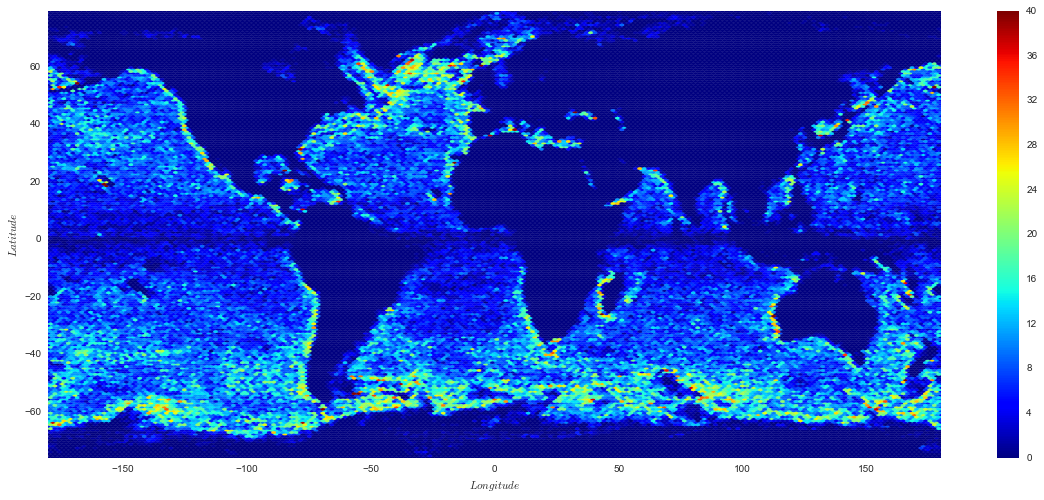

In [50]:
plt.rcParams['figure.figsize'] = (20, 8)

map_origin = coordinate_origin.plot(kind='hexbin', x='longitude', y='latitude', sharex=False,
                                   gridsize=200, vmin=0, vmax=40, cmap='jet')

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

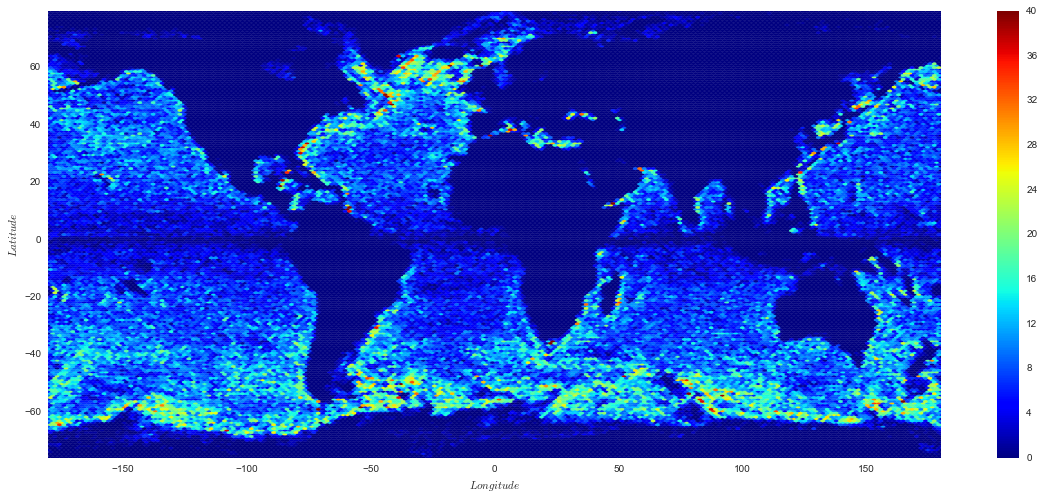

In [52]:
plt.rcParams['figure.figsize'] = (20, 8)

map_termination = coordinate_termination.plot(kind='hexbin', x='longitude', y='latitude', sharex=False,
                                              gridsize=200, vmin=0, vmax=40, cmap='jet')

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

__8. Statistics__

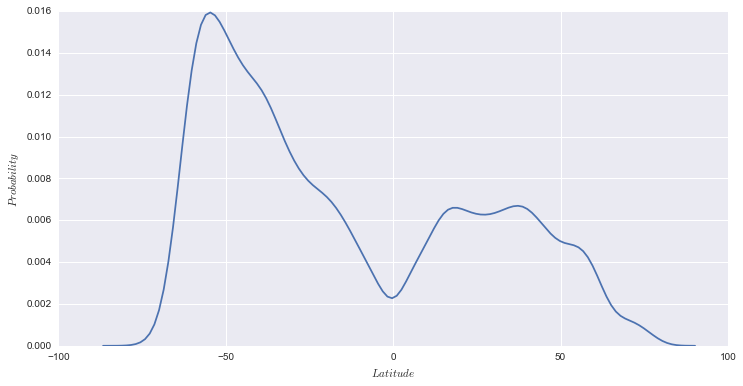

In [53]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(lat_origin_df, hist = False)

plt.xlabel('$Latitude$')
plt.ylabel('$Probability$')

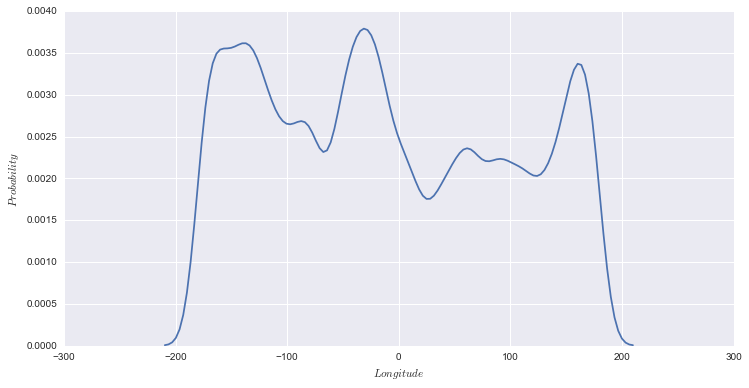

In [54]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(lon_origin_df, hist = False)

plt.xlabel('$Longitude$')
plt.ylabel('$Probability$')

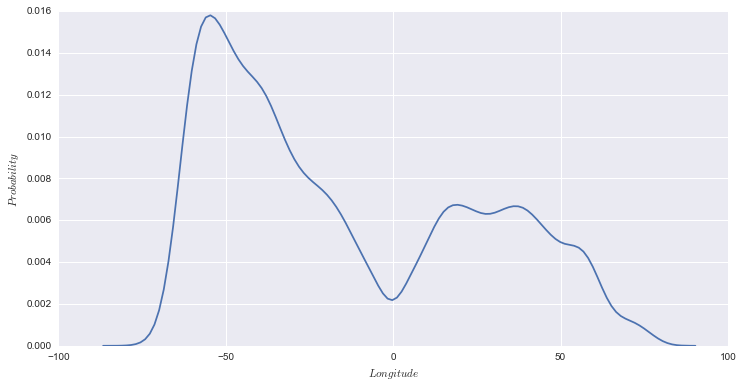

In [55]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(lat_termination_df, hist = False)

plt.xlabel('$Longitude$')
plt.ylabel('$Probability$')

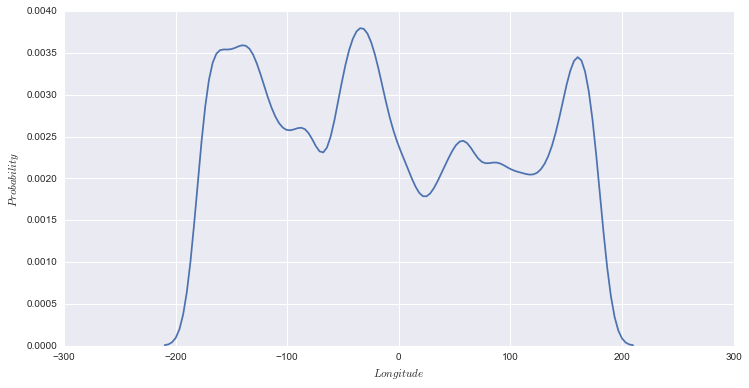

In [56]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(lon_termination_df, hist = False)

plt.xlabel('$Longitude$')
plt.ylabel('$Probability$')

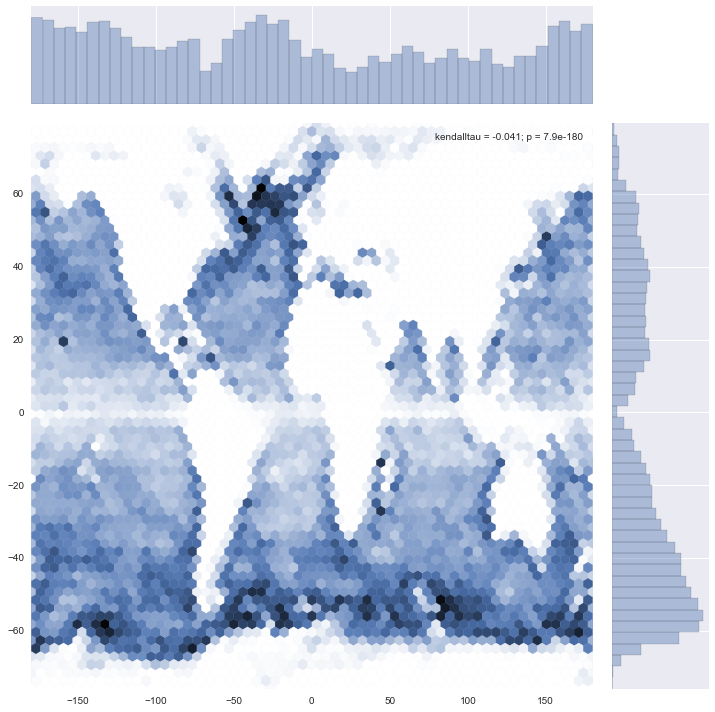

In [58]:
sns.jointplot(lon_origin_df, lat_origin_df, kind="hex", stat_func=kendalltau, size=10, ratio=5, space=0.2)

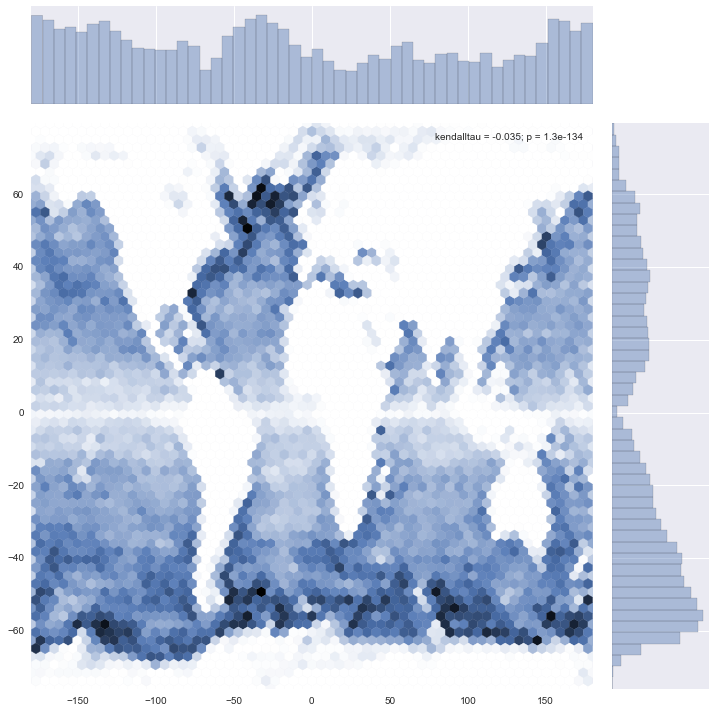

In [59]:
sns.jointplot(lon_termination_df, lat_termination_df, kind="hex", stat_func=kendalltau, size=10, ratio=5, space=0.2)

__9. Australia__

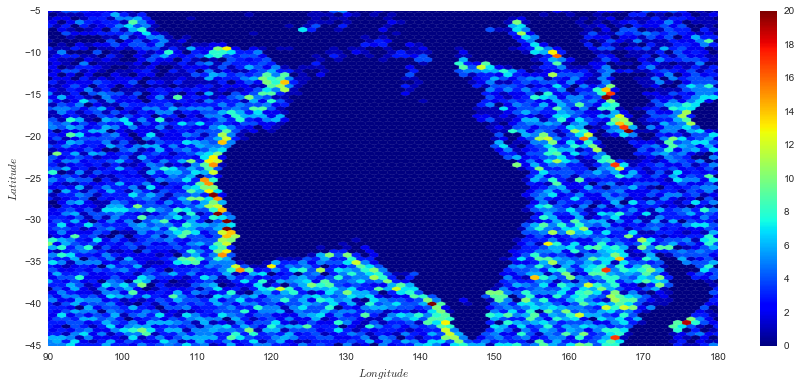

In [61]:
plt.rcParams['figure.figsize'] = (15, 6)

map_origin = coordinate_origin.plot(kind='hexbin', x='longitude', y='latitude', sharex=False,
                                    gridsize=300, vmin=0, vmax=20, cmap='jet')

plt.xlim([90, 180])
plt.ylim([-45, -5])

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

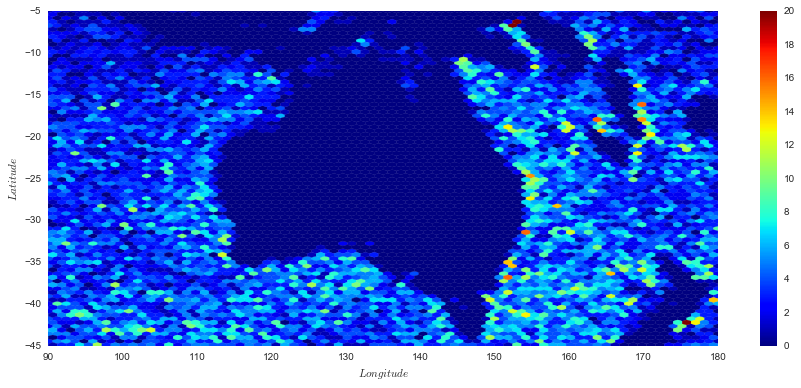

In [62]:
plt.rcParams['figure.figsize'] = (15, 6)

map_termination = coordinate_termination.plot(kind='hexbin', x='longitude', y='latitude', sharex=False,
                                              gridsize=300, vmin=0, vmax=20, cmap='jet')

plt.xlim([90, 180])
plt.ylim([-45, -5])

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

__10. Maps for the Question Posted on Stack Overflow__

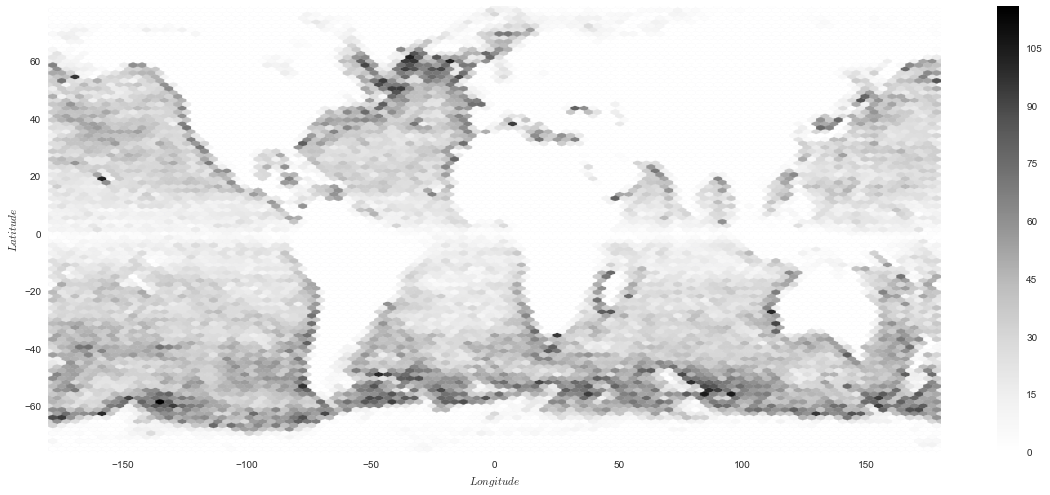

In [63]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.hexbin(lon_origin_df, lat_origin_df)
plt.colorbar()

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

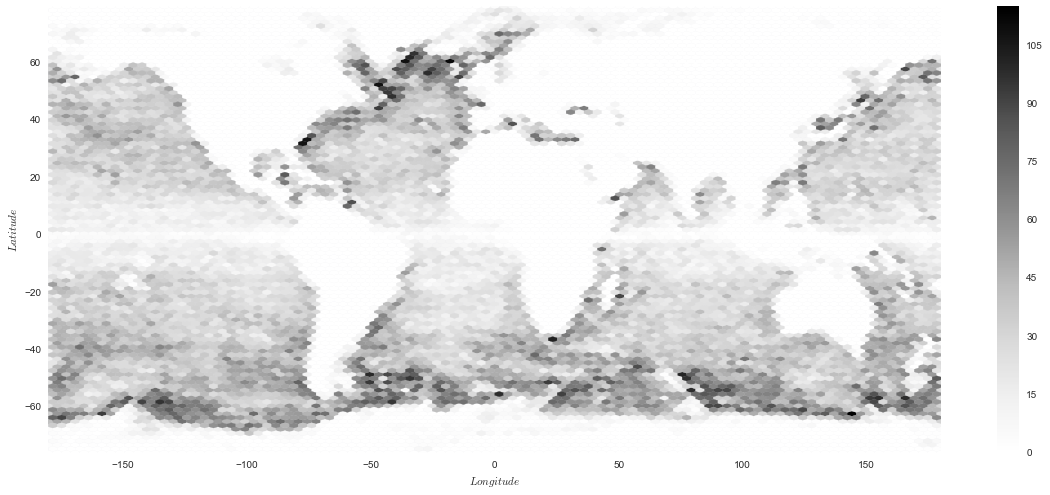

In [64]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.hexbin(lon_termination_df, lat_termination_df)
plt.colorbar()

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

__11. Quantitative Methods__


The energy of a single eddy

$$ E = \int \int \int \left( u^2 + v^2 \right) dx dy dz $$

Approximation for energy

$$ E = u^2_{rms} V $$

The volumn of a single eddy

$$ V = \pi r^2 h $$

Approximation for depth

$$ h = 500 m $$

Energy

$$ \frac{dE}{dt} = \frac{\Delta \left( \sum{E} \right)}{\Delta t} $$

Energy in total

$$ \sum{E} = E \times N_{hexbin} \times \rho_{point} $$



__12. Results__

(1) Power per area of eddy energy sources in watts per meter square =  $P_1/A$

(2) Power per area of eddy energy sinks in watts per meter square = $P_2/A$

(3) Comparison between $P_2$ and $P_1$

__13. Calculation__

In [65]:
lon_origin_array = np.asarray(lon_origin_df)
lat_origin_array = np.asarray(lat_origin_df)
energy_origin_array = np.asarray(energy_origin)

lon_termination_array = np.asarray(lon_termination_df)
lat_termination_array = np.asarray(lat_termination_df)
energy_termination_array = np.asarray(energy_termination)

In [66]:
lon_origin = pd.DataFrame(lon_origin_array)
lat_origin = pd.DataFrame(lat_origin_array)
energy_origin = pd.DataFrame(energy_origin_array)

source = pd.concat([lat_origin, lon_origin, energy_origin], axis=1)
source.columns = ['latitude', 'longitude','energy']
source.head(4)

latitude   longitude        energy
0 -65.001099  -83.260010  1.138290e+13
1 -62.542400 -159.357971  1.484267e+13
2 -60.751999  164.956970  8.649863e+13
3 -61.428299  129.165985  1.168999e+14

In [67]:
lon_termination = pd.DataFrame(lon_termination_array)
lat_termination = pd.DataFrame(lat_termination_array)
energy_termination = pd.DataFrame(energy_termination_array)

sink = pd.concat([lat_termination, lon_termination, energy_termination], axis=1)
sink.columns = ['latitude', 'longitude','energy']
sink.head(4)

latitude   longitude        energy
0 -65.293297  -84.155029  8.069366e+12
1 -62.726101 -159.156006  1.129224e+13
2 -61.454601  166.448975  7.904814e+13
3 -61.127899  128.390015  6.476447e+13

__14. Coordinate Range__

Latitude: [-45, -5]

Longitude: [145, 175]

In [68]:
E_source = 0
count_source = 0

for i in range(0, 215184):
    if lat_origin_array[i] > -45 and lat_origin_array[i] < -5 and lon_origin_array[i] > 145 and lon_origin_array[i] < 175:
        count_source = count_source + 1
        E_source = E_source + energy_origin_array[i]

In [69]:
print(count_source)

6455


In [70]:
print(E_source)

[  3.58890176e+18]


In [71]:
E_sink = 0
count_sink = 0

for i in range(0, 215184):
    if lat_termination_array[i] > -45 and lat_termination_array[i] < -5 and lon_termination_array[i] > 145 and lon_termination_array[i] < 175:
        count_sink = count_sink + 1
        E_sink = E_sink + energy_termination_array[i]

In [72]:
print(count_sink)

7113


In [73]:
print(E_sink)

[  4.34107870e+18]


__15. Temporal scale__

From __October 12, 1992__ to __April 04, 2012__

* __19__ Years, __5__ Month, __21__ Days

* __614,563,200__ seconds

In [74]:
t = 614563200

In [75]:
P_source = E_source/t
print(P_source)

[  5.83976026e+09]


In [76]:
P_sink = E_sink/t
print(P_sink)

[  7.06368148e+09]


__16. Spatial scale__

From __45 S__ to __5 S__

From __145 E__ to __175 E__

* __13,305,322__ km$^2$

* __13,305,322,214,546__ m$^2$

In [77]:
A = 13305322214546

In [81]:
P_source_area = P_source/A
print(P_source_area)

[ 0.0004389]


In [82]:
P_sink_area = P_sink/A
print(P_sink_area)

[ 0.00053089]


In [83]:
delta_P = (- P_sink_area) + (+ P_source_area)
print(delta_P)

[ -9.19873414e-05]


__17. Conlusion__

* Energy sources per area

$$ \Phi_1 = 4.2820 \times 10^{-7} \ W m^{-2} $$

* Energy sinks per area

$$ \Phi_2 = 5.1794 \times 10^{-7} \ W m^{-2} $$

* The difference between energy sources and energy sinks

$$ \Delta \Phi = \ –8.9744 \times 10^{-8} \ W m^{-2} $$

__18. Tests of Difference Mapping__

In [168]:
x  = np.random.random(1000)
y1 = np.random.random(1000)
y2 = np.random.random(1000)

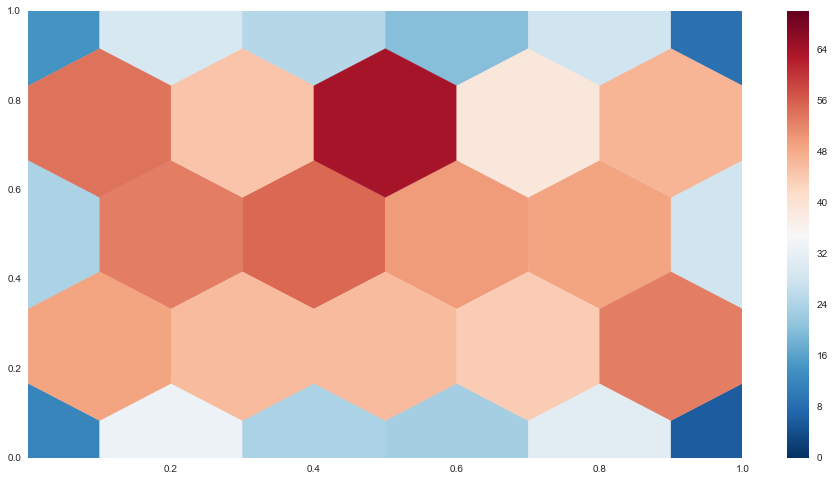

In [169]:
plt.rcParams['figure.figsize'] = (16, 8)

h1=pl.hexbin(x, y1, gridsize=5, vmin=0, vmax=70, cmap=pl.cm.RdBu_r)
pl.colorbar()

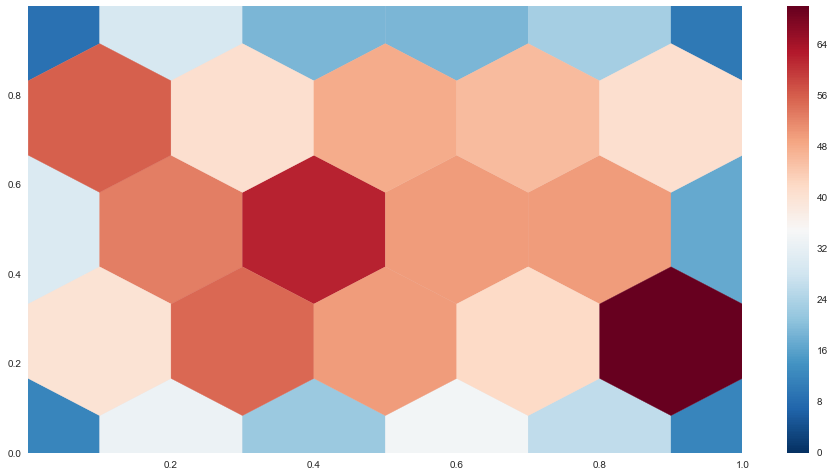

In [170]:
plt.rcParams['figure.figsize'] = (16, 8)

h2=pl.hexbin(x, y2, gridsize=5, vmin=0, vmax=70, cmap=pl.cm.RdBu_r)
pl.colorbar()

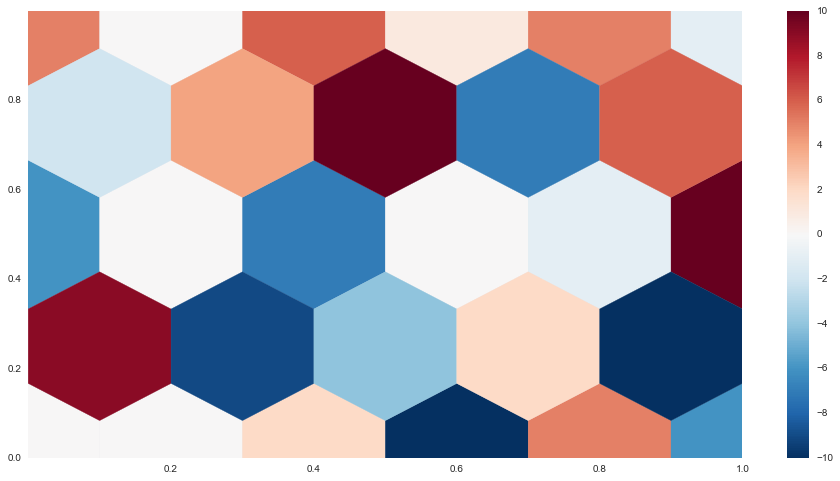

In [171]:
plt.rcParams['figure.figsize'] = (16, 8)

h3=pl.hexbin(x, y2, gridsize=5, vmin=-10, vmax=10, cmap=pl.cm.RdBu_r)
h3.set_array(h1.get_array()-h2.get_array())
pl.colorbar()

__19. Difference Maps Preparation__

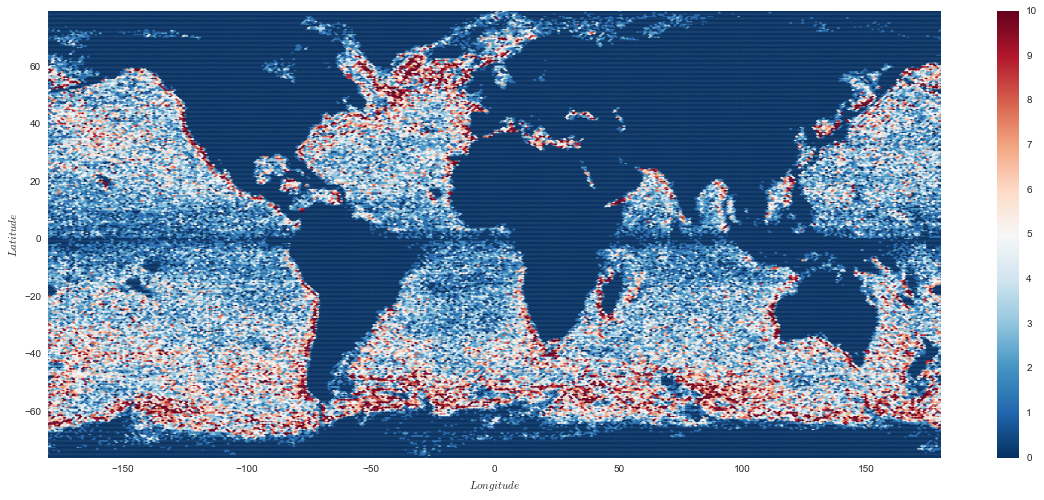

In [68]:
plt.rcParams['figure.figsize'] = (20, 8)

map_origin = pl.hexbin(lon_origin_array, lat_origin_array,
                       gridsize=300, vmin=0, vmax=10, cmap=pl.cm.RdBu_r)

pl.colorbar()

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

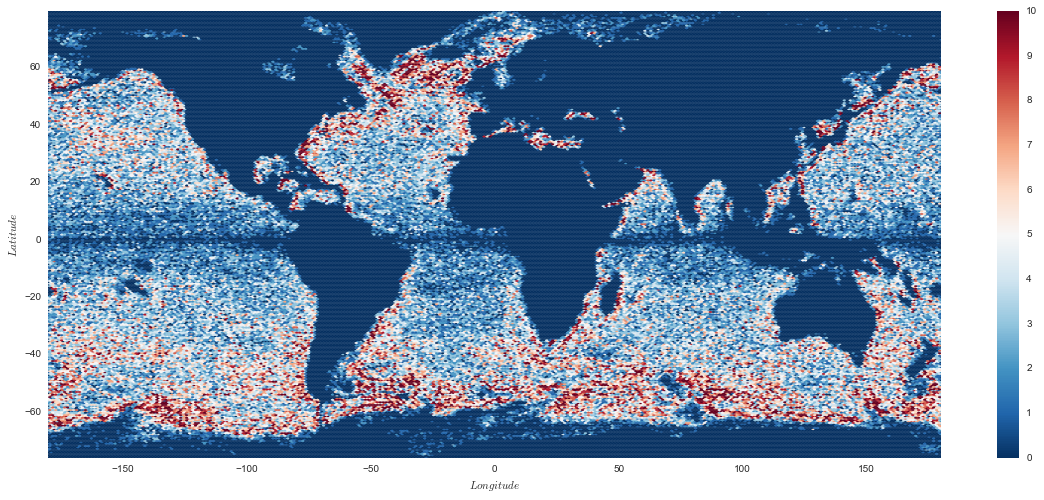

In [69]:
plt.rcParams['figure.figsize'] = (20, 8)

map_termination = pl.hexbin(lon_termination_array, lat_termination_array,
                            gridsize=300, vmin=0, vmax=10, cmap=pl.cm.RdBu_r)

pl.colorbar()

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

__20. Difference Maps__

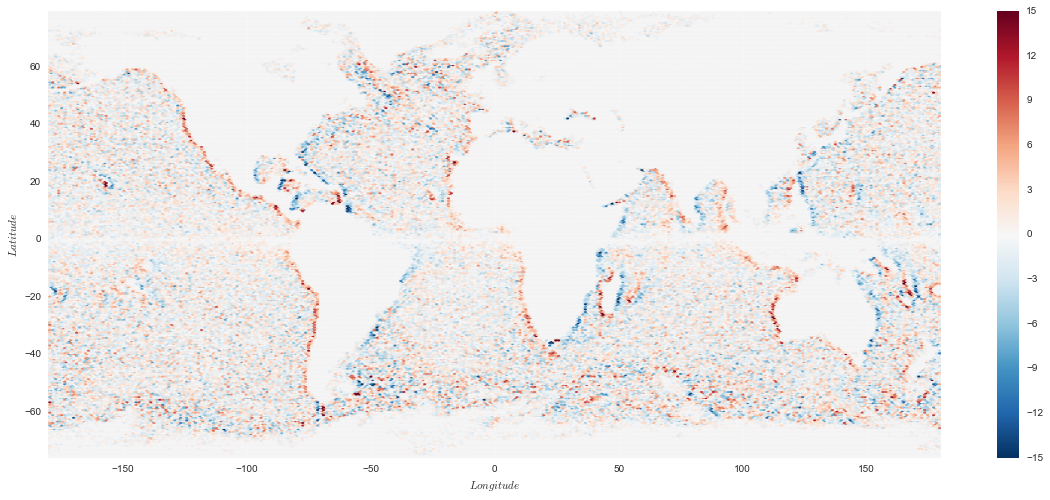

In [70]:
plt.rcParams['figure.figsize'] = (20, 8)

map_difference = pl.hexbin(lon_origin_array, lat_origin_array, gridsize=300, vmin=-15, vmax=15, cmap=pl.cm.RdBu_r)
map_difference.set_array(map_origin.get_array() - map_termination.get_array())

pl.colorbar()

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

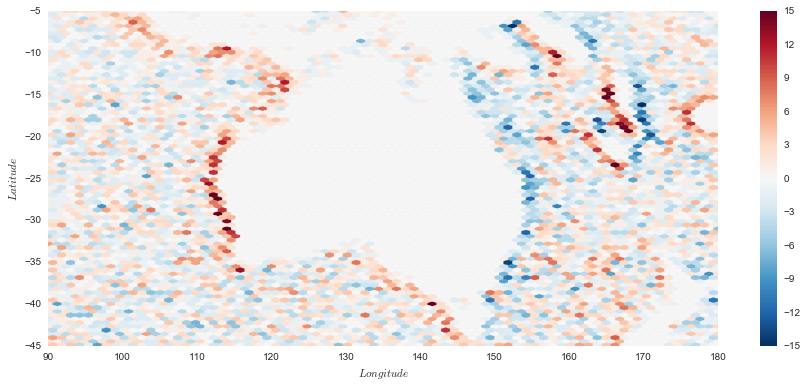

In [71]:
plt.rcParams['figure.figsize'] = (15, 6)

map_difference = pl.hexbin(lon_origin_array, lat_origin_array, gridsize=300, vmin=-15, vmax=15, cmap=pl.cm.RdBu_r)
map_difference.set_array(map_origin.get_array() - map_termination.get_array())

plt.xlim([90, 180])
plt.ylim([-45, -5])

pl.colorbar()

plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')